In [346]:
from sklearn import datasets                 # to get regression data for model
import torch
from torch.nn import Linear, Sequential, Flatten, MSELoss
from torch.optim import SGD, Adam, LBFGS     # stochastic optimizer and gradient descent optimizer
import numpy as np          
import matplotlib.pyplot as plt

## Step1_Data required for training

In [356]:
# random X data
X = torch.FloatTensor(1200, 1).uniform_(0, 2)

# create a Y data of degree 3 of random coefficients
Y = 0.3*X.pow(3)-0.2*X.pow(2)+0.6*X.pow(1)+0.9

# for n degree polynomial to be fitted =>> we need (X^0 till X^degree) to be inputted to model
# degree = degree of polynomial to be fitted: for n degree polynomial

degree = 3
p = torch.linspace(0, degree , degree + 1 )
XX = X.pow(p)

## Step2_Defining the model (regression) - input, output

In [357]:
# # method 1
# # using linear model from torch.nn
# model = Linear(in_features = degree + 1, out_features = 1, bias=True)

# method 2
# using sequential model from torch.nn
model = Sequential(
        Linear(degree + 1, 1),
        Flatten(0,1)
        )

## Step3_Model ingredients

In [358]:
critereon = MSELoss()                          # how the loss is to be calculated - Mean square or L2     
optim = Adam(model.parameters(), lr=0.1)       # how the network is to be optimized - Adam or SGD

## Step4_Model Training - forward, backward, weight updates

In [360]:
no_of_epochs = 1000   # number of iterations that has to be done
for epoch in range(no_of_epochs):
    
    # forward pass -> model predictions and Loss
    pred = model(XX).unsqueeze(1)
    loss = critereon(pred, Y)
    
    # backward pass -> calculate gradients 
    loss.backward()    
 
    # weights update from the optimizer
    optim.step()
     
    # zeroing gradients before next iteration
    optim.zero_grad()
    
    # print the loss and polynomial_coefficients
    if epoch % 300 == 0:
        print('epoch : ', epoch , 'loss :', loss.item())
        print('polynomial_coefficients : ', list(model.parameters())[0].data.numpy())   

epoch :  0 loss : 1.178503394126892
polynomial_coefficients :  [[0.1718283  0.28953502 0.8532217  0.1665265 ]]
epoch :  300 loss : 0.0013613583287224174
polynomial_coefficients :  [[ 0.4272575  -0.00373293  0.52657413  0.06366824]]
epoch :  600 loss : 0.0010275274980813265
polynomial_coefficients :  [[0.42145318 0.07122567 0.43016905 0.096253  ]]
epoch :  900 loss : 0.0006941792089492083
polynomial_coefficients :  [[0.4128449  0.16546082 0.3178635  0.13256384]]


## Step5_Plotting results

<function matplotlib.pyplot.show(close=None, block=None)>

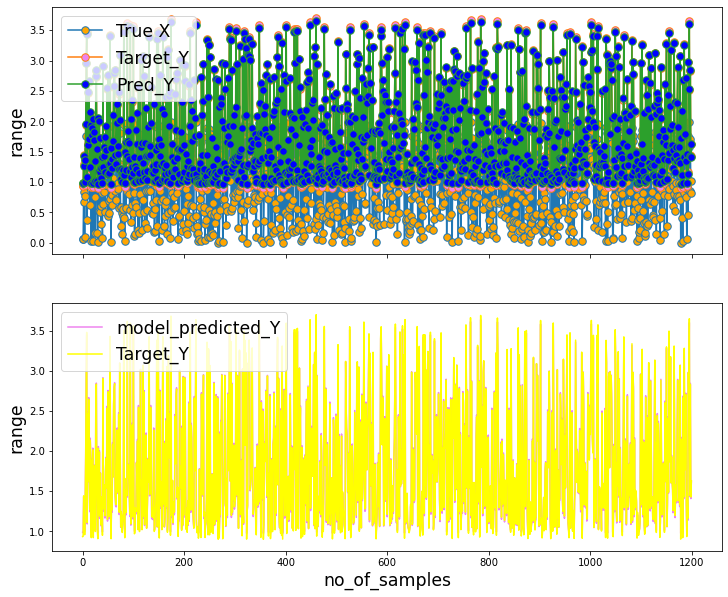

In [371]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12, 10), squeeze=True)

ax1.plot(X.detach().numpy(),  marker=".", markersize=15, markerfacecolor='orange', label="True X")
ax1.plot(Y,  marker=".", markersize=15, markerfacecolor='violet', label="Target_Y")
ax1.plot(pred.detach().numpy(),  marker=".", markersize=15, markerfacecolor='blue', label="Pred_Y")
ax1.set_ylabel(r"range", fontsize="xx-large")
ax1.legend(fontsize="xx-large")

ax2.plot(pred.detach().numpy(), 'violet', label = 'model_predicted_Y')
ax2.plot(Y.detach().numpy(), 'yellow', label = 'Target_Y')
ax2.set_ylabel(r"range", fontsize="xx-large")
ax2.set_xlabel(r"no_of_samples", fontsize="xx-large")
ax2.legend(fontsize="xx-large")

plt.show